In [1]:
import pickle as pk
from scipy.stats import ks_2samp
from glob import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pkl_file=open('DK43.pkl','rb')
Dnames=pk.load(pkl_file)
Dnames.keys()

dict_keys(['Background', '3D boxes', 'Boxes locations', 'Feature names'])

In [3]:
Back=Dnames['Background']
names=Dnames['Feature names']
Back.shape, len(names)

((20, 2000), 20)

In [4]:
data_dir='/Users/yoavfreund/projects/statistical_significance_data/DK39/'

For DK39, 93 files and a total of 433440 boxes, 67632840 cells

In [9]:
cdfs=[]
box_locations=[]
box_indexes=[]
i=0
for file in glob(data_dir+'*.pkl'):
    print('\r%d,'%i,end=''); i+=1
    pkl_file=open(file,'rb')
    D=pk.load(pkl_file)
    cdfs+=D['Box cdfs']
    box_locations+=D['Box locations']
    box_indexes+=D['Box grid indexes']

92,

In [11]:
len (box_locations),len(cdfs),len(box_indexes)

(433440, 433440, 433440)

In [19]:
type(box_indexes[0]), type(box_locations[0])

(list, numpy.ndarray)

In [23]:
box_loc=concatenate(box_locations)
box_loc[:5,:]

array([[2310.8890848 ,  587.34453522, 3741.58212364],
       [2646.87305699,  648.45730847, 3727.10946308],
       [2758.86771439,  668.82823289, 3722.28524289],
       [2870.86237179,  689.1991573 , 3717.4610227 ],
       [3206.84634398,  750.31193055, 3702.98836213]])

In [24]:
box_ind=array(box_indexes)
box_ind[:10,:]

array([[89, 20, 49],
       [92, 20, 49],
       [93, 20, 49],
       [94, 20, 49],
       [97, 20, 49],
       [86, 21, 49],
       [89, 21, 49],
       [90, 21, 49],
       [91, 21, 49],
       [92, 21, 49]])

In [25]:
box_ind.shape, box_loc.shape

((433440, 3), (433440, 3))

### Transform box_ind into an 3D array of indexes

In [28]:
np.min(box_ind,axis=0),np.max(box_ind,axis=0)

(array([11, 16,  0]), array([175,  91,  92]))

In [32]:
axis_to_index=np.zeros([176,92,93],dtype=np.int32)

for i in range(box_ind.shape[0]):
    if i%1000==0:
        print('\r%d'%i,end='')
    axis_to_index[box_ind[i,0],box_ind[i,1],box_ind[i,2]]=i


433000

In [9]:
_all=concatenate(cdfs,axis=1)

l=_all.shape[1]
p=3000./l
select=np.random.choice([0, 1], size=(l,), p=[1-p, p])

_sample=_all[:,select==1]
_sample.shape

def plot_CDF(cdf,label):
    cdf=np.sort(cdf)
    P=arange(0,1,1/cdf.shape[0])
    plot(cdf,P,label=label);

In [62]:
#analyze number of cells per box.
L=[]
for CDF in cdfs:
    L.append(CDF.shape[1])
len(L),max(L),sum(L)

(433440, 678, 67632840)

In [85]:
mean(L),std(L)

(156.03737541528238, 81.30659304183506)

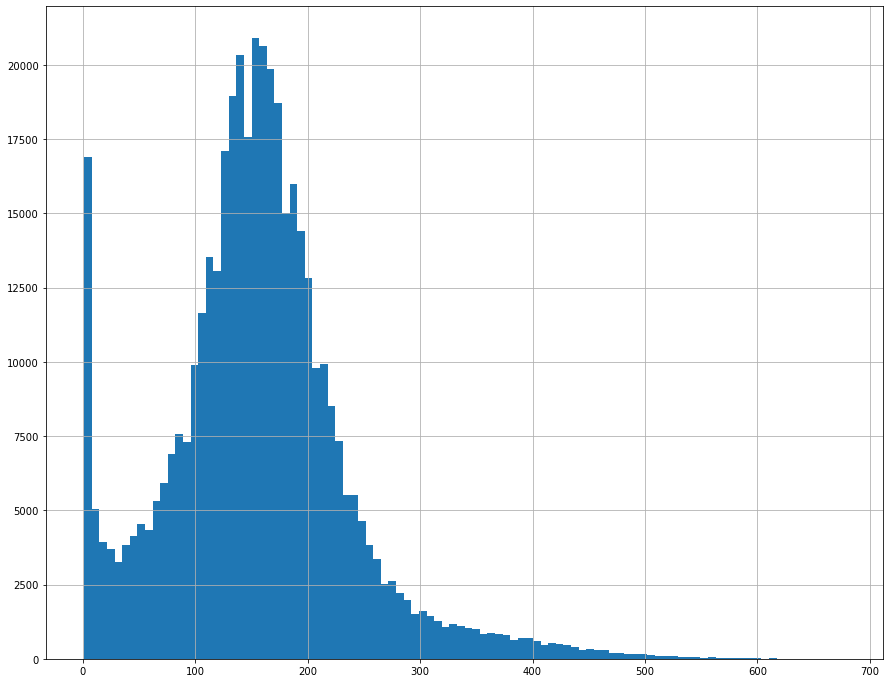

In [86]:
figure(figsize=[15,12])
hist(L,bins=100);
grid()

In [64]:
from scipy.stats import ks_2samp

In [66]:
cdfs[500].shape

(20, 238)

### To Kui

#### Comparing brains
If a box has a feature that is significant relative to background - can we find a box with similar properties at a close location in the other brain.

Where "similar properties" means that both are significant relative to background for the same feature, and the KS pvalue between the boxes fromn the two brain is large.

#### Neighborhood relations
Alter the code below to compare each box to it's 28 neighbors.

For each feature, compute significance of center box, if it is significant, then compute sig to background of neighbors. If that is also significant, compute significance of neighbor relative to center.

Generates for each neighboring pair and each feature a relationship that is one of:
1) at least one box is not significant
2) both boxes are significant and agree (High P value >0.1)
3) both boxes are significant and disagree (low P value <0.01)
4) both boxes are significant and neither agree or disagree (P val betwen 0.1 and 0.01.

===========



In [34]:
for i in range(500,800): #len(D['3D boxes'])):
    Fore=cdfs[i]
    for j in range(20):
        cdf1=Fore[j,:]
        cdf2=Back[j,:]
        pval=ks_2samp(cdf1,cdf2).pvalue
        if(pval<0.001):
            if names[j]!='rotation': # in ['mean','std']:
                continue
            pval_to_next=ks_2samp(cdfs[i][j,:],cdfs[i+1][j,:]).pvalue
            pval_next = ks_2samp(cdfs[i+1][j,:],Back[j,:]).pvalue
            if pval_next>0.01 or pval_to_next<.1:
                continue
            print("%3d %20s: pval=%5.0g, pval_to_next=%5.0g, pval_next=%5.0g"%(i,names[j],pval,pval_to_next,pval_next))

527             rotation: pval=3e-08, pval_to_next=  0.1, pval_next=0.003
570             rotation: pval=3e-06, pval_to_next=  0.9, pval_next=6e-05
586             rotation: pval=1e-08, pval_to_next=    1, pval_next=5e-11
594             rotation: pval=5e-06, pval_to_next=  0.5, pval_next=9e-05
595             rotation: pval=9e-05, pval_to_next=  0.8, pval_next=0.0001
596             rotation: pval=0.0001, pval_to_next=  0.5, pval_next=0.0005
636             rotation: pval=1e-07, pval_to_next=  0.6, pval_next=3e-07
637             rotation: pval=3e-07, pval_to_next=  0.7, pval_next=2e-06
638             rotation: pval=2e-06, pval_to_next=  0.2, pval_next=0.002
661             rotation: pval=0.0004, pval_to_next=  0.8, pval_next=0.006
672             rotation: pval=5e-05, pval_to_next=  0.7, pval_next=6e-05
675             rotation: pval=0.0001, pval_to_next=  0.7, pval_next=0.004
677             rotation: pval=0.0003, pval_to_next=  0.5, pval_next=0.005
689             rotation: pval=2

### Suggested Heuristics
Connect neighboring boxes if there is a feature on which both are significantly different from the background, but not significantly different from each other.